In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ЧАСТИНА 1
# завантажимо дані з датасети і роздивимось що вони собою являють.
path_1 = r'C:\PythonProject\Python_Data_Science\data6\data_2d.csv'

# оскілки індексів столбців в файлі нема, надамо свої
names = ['target', 'feature_1', 'feature_2']
df = pd.read_csv(path_1, names=names)
df.head()

,target,feature_1,feature_2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [5]:
df.shape

(200, 3)

<Axes: xlabel='feature_1', ylabel='feature_2'>

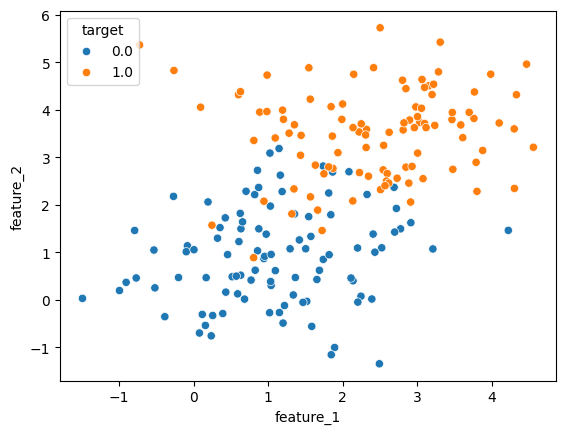

In [6]:
# 200 точок які відносяться до классу 0 або 1, візуалізація показує значне накладання між собою
sns.scatterplot(x=df['feature_1'], y=df['feature_2'], hue=df['target'])

In [7]:
from sklearn.cluster import KMeans

X, y = df.iloc[:, [1, 2]], df.iloc[:, 0]
X.head()

,feature_1,feature_2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218


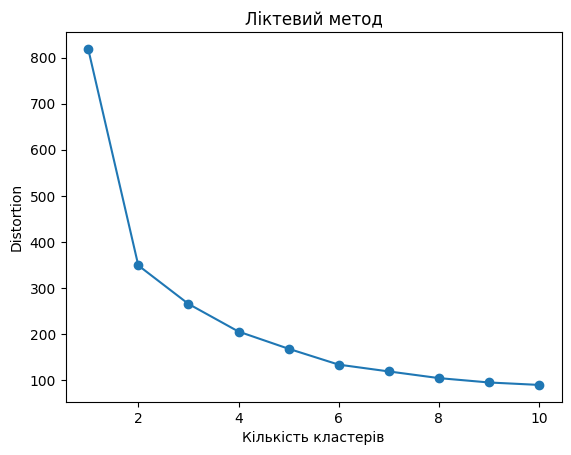

In [19]:
elbow_range = range(1, 11)
distortions = []
for k in elbow_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(elbow_range, distortions, marker="o")
plt.xlabel("Кількість кластерів")
plt.ylabel("Distortion")
plt.title("Ліктевий метод")
plt.show()

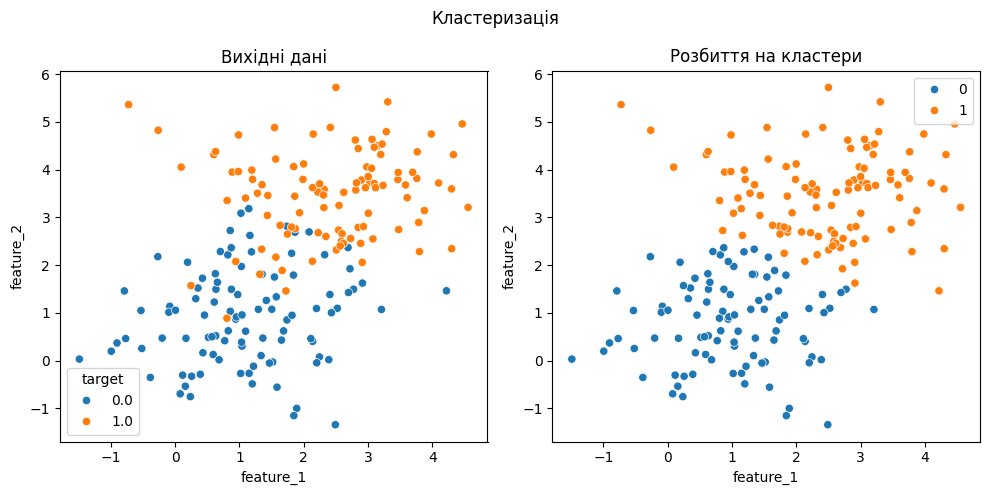

In [9]:
# ліктевий метод показуєна графику значний злам після 2 кластерів. тож оскільки ми не зовсім розусіємо зміст данних то можемо розбити на 2 кластери

y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=df['feature_1'], y=df['feature_2'], hue=df['target'], ax=ax1)
ax1.set_title("Вихідні дані")

sns.scatterplot(x=df['feature_1'], y=df['feature_2'], hue=y_pred, ax=ax2)
ax2.set_title("Розбиття на кластери")

plt.suptitle("Кластеризація")
plt.tight_layout()
plt.show()

In [10]:
# ЧАСТИНА 2
path_2 = r'C:\PythonProject\Python_Data_Science\data6\mnist.csv'

# оскілки індексів столбців в файлі нема, застосуємо новостворені по замовчуваннюї
df_2 = pd.read_csv(path_2, header=None)

df_2.head(), df_2.shape

(   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
 0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    0  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    0  
 3    0    0    0    0    0    0  
 4    0    0    0    0    0    0  
 
 [5 rows x 785 columns],
 (500, 785))

<Axes: >

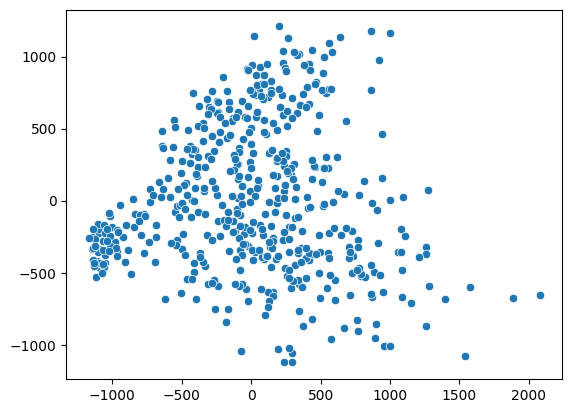

In [13]:
# кількість ознак просто неописуєма! 785 карл!, ніби щось з бази даних рукописних символів. щож, зменшим їх до двох як рекомендує умова ДЗ
from sklearn.decomposition import PCA

num_components = 2
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(df_2)

# Візуалізуємо отримані дані
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])

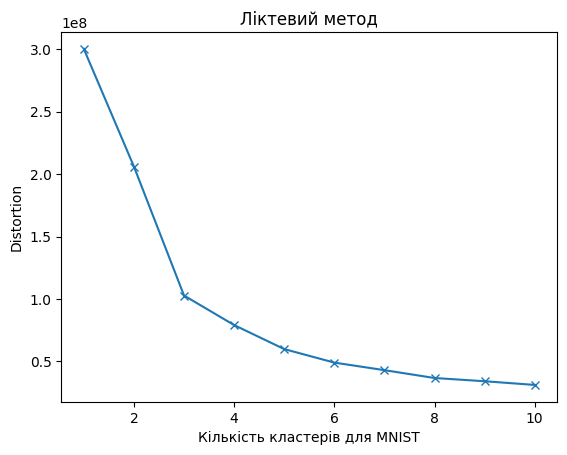

In [20]:
# Застосуємо знов ліктевий метод для визначення як виглядає наша функція втрат при зміні кількості кластерів
distortions_mnist = []
for k in elbow_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    distortions_mnist.append(km.inertia_)
    
plt.plot(elbow_range, distortions_mnist, marker="x")
plt.xlabel("Кількість кластерів для MNIST")
plt.ylabel("Distortion")
plt.title("Ліктевий метод")
plt.show()

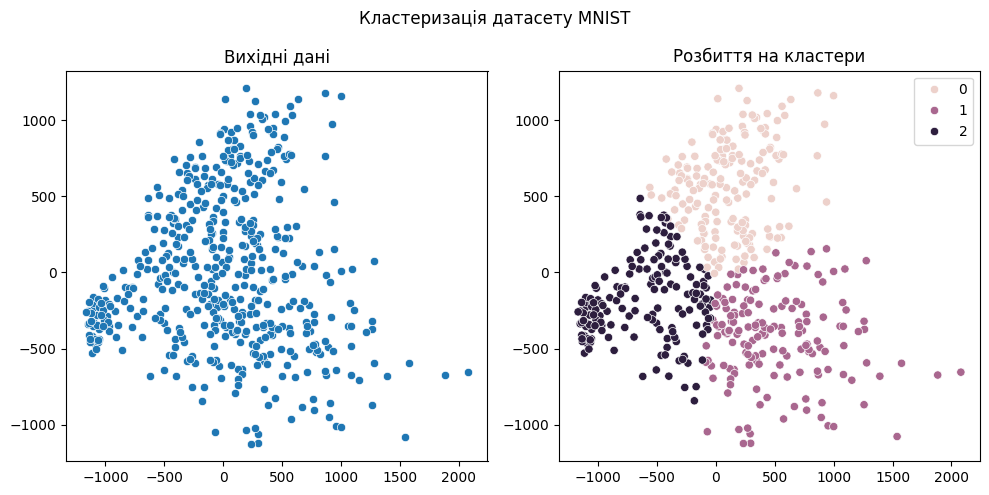

In [18]:
# Зробимо кластерізацію нашого датасету при кількості кластерів 3

y_pred_mnist = KMeans(n_clusters=3, random_state=170).fit_predict(X_pca)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], ax=ax1)
ax1.set_title("Вихідні дані")

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred_mnist, ax=ax2)
ax2.set_title("Розбиття на кластери")

plt.suptitle("Кластеризація датасету MNIST")
plt.tight_layout()
plt.show()